In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# 單層建構函式
def make_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

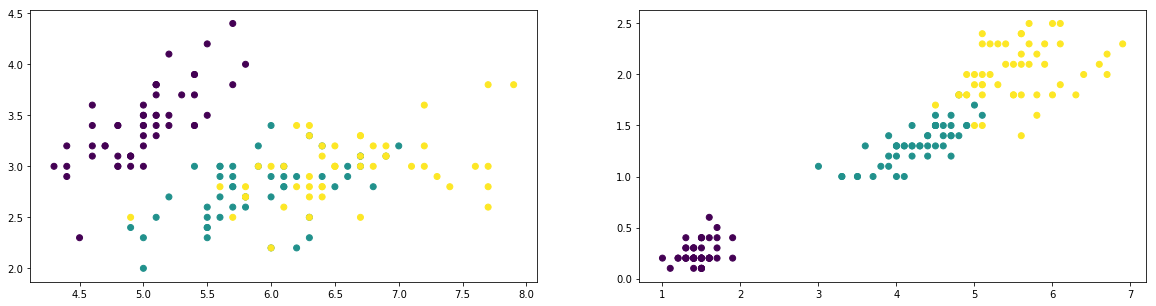

In [26]:
# Load and show datasets.
from sklearn import datasets

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
ax[0].scatter(x=datasets.load_iris()['data'][:,[0]],
              y=datasets.load_iris()['data'][:,[1]],
              c=datasets.load_iris()['target'])
ax[1].scatter(x=datasets.load_iris()['data'][:,[2]],
              y=datasets.load_iris()['data'][:,[3]],
              c=datasets.load_iris()['target'])
plt.show()

In [27]:
# 定義輸出入變數
xs = tf.placeholder(tf.float32,[None,4]) # 輸入資料維度
ys = tf.placeholder(tf.float32,[None,3]) # 輸出資料維度

# 定義多層流程
my_activation_function = tf.nn.relu # 統一中間層活化函數
layer_hidden_1 = make_layer(xs, 4, 10, activation_function=my_activation_function)
layer_hidden_2 = make_layer(layer_hidden_1, 10, 10, activation_function=my_activation_function)
layer_output   = make_layer(layer_hidden_2, 10, 3, activation_function=my_activation_function) 

In [56]:
# 定義損失函數
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=layer_output, labels=ys))
train = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [57]:
# 變數初始化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [58]:
# 產生 one-hot iris labels
one_hot_iris_labels = tf.Session().run(
                        tf.one_hot(indices=datasets.load_iris()['target'],
                                   depth=len(set(datasets.load_iris()['target']))))

In [59]:
# 訓練
for i in range(1000):
    sess.run(train, feed_dict={xs:datasets.load_iris()['data'], ys:one_hot_iris_labels})
    if(0 == i%100):
        print(sess.run(loss,feed_dict={xs:datasets.load_iris()['data'], ys:one_hot_iris_labels}))

4.55308
0.337191
0.179153
0.134634
0.158512
0.0776472
0.0786182
0.0820657
0.0665271
0.0577411


In [ ]:
# 剩下視覺化